# Data Mining Assignment 2
## Taskeen Fatima - 03-134211-045

In [18]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import lightgbm as lgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import scipy.cluster.hierarchy as sch
from sklearn.feature_selection import VarianceThreshold

In [2]:
# Load the dataset
data = pd.read_csv('/content/lung cancer survey.csv')

In [3]:
# Display the initial rows of the dataset
print(data.head())

# Data information and summary statistics
print(data.info())
print(data.describe())

  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  
0                    2                      

## Data preprocessing

In [4]:
# Encode categorical features
label_encoder = LabelEncoder()
data['GENDER'] = label_encoder.fit_transform(data['GENDER'])  # M becomes 1, F becomes 0
data['LUNG_CANCER'] = label_encoder.fit_transform(data['LUNG_CANCER'])  # YES becomes 1, NO becomes 0

In [5]:
# Check for missing values
print("Missing values:\n", data.isnull().sum())

Missing values:
 GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64


## Feature Selection

In [6]:
# Feature selection: remove low-variance features
selector = VarianceThreshold(threshold=0.1)
selected_features = selector.fit_transform(data.drop('LUNG_CANCER', axis=1))

# Scale the selected features
scaler = StandardScaler()
selected_features_scaled = scaler.fit_transform(selected_features)

### Model Training and Testing

In [7]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(selected_features_scaled)
silhouette_kmeans = silhouette_score(selected_features_scaled, kmeans_labels)

# Apply Agglomerative clustering
agglo = AgglomerativeClustering(n_clusters=2, linkage='ward')
agglo_labels = agglo.fit_predict(selected_features_scaled)
silhouette_agglo = silhouette_score(selected_features_scaled, agglo_labels)

Model Evaluation

Confusion Matrix for K-Means:
 [[  0  39]
 [  0 270]]
Accuracy for K-Means: 0.8737864077669902
Confusion Matrix for Agglomerative Clustering:
 [[  0  39]
 [  0 270]]
Accuracy for Agglomerative Clustering: 0.8737864077669902


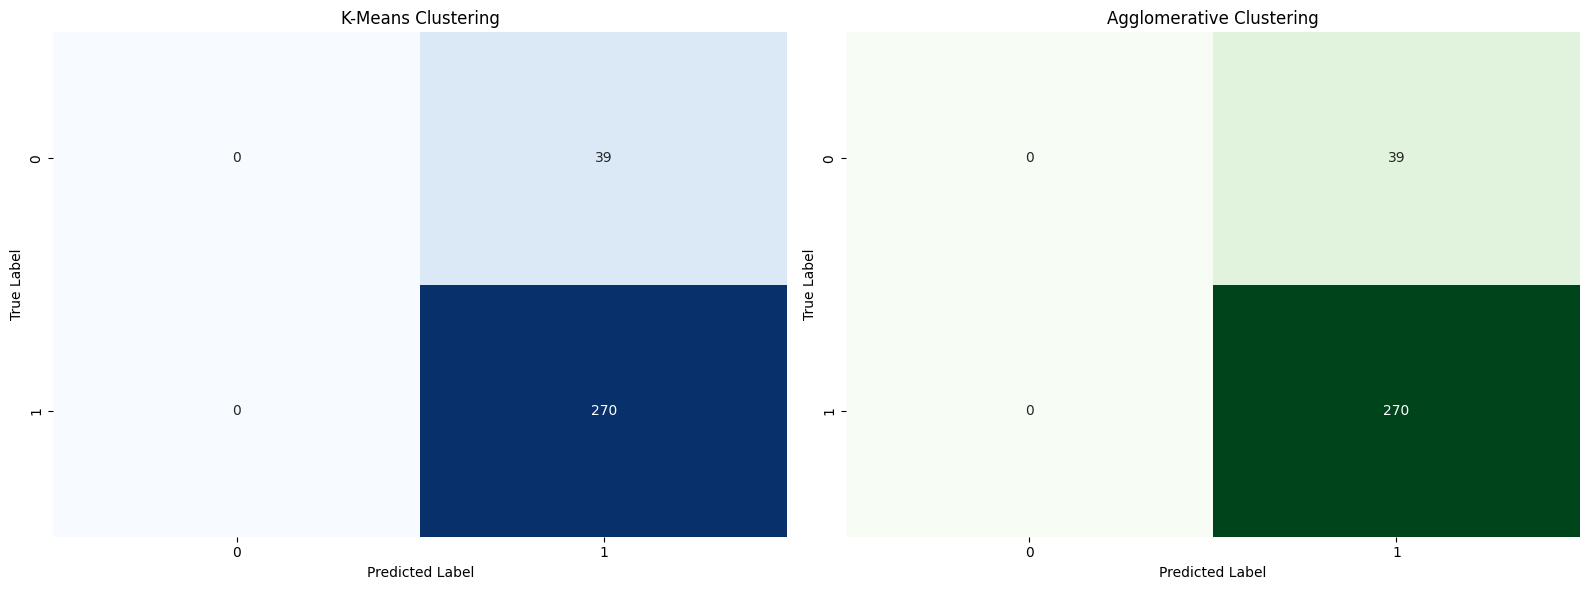

In [8]:
# Align cluster labels
def align_labels(true_labels, cluster_labels):
    new_labels = np.zeros_like(cluster_labels)
    for i in np.unique(cluster_labels):
        mask = (cluster_labels == i)
        true_labels_in_cluster = true_labels[mask]
        most_common_label = np.bincount(true_labels_in_cluster).argmax()
        new_labels[mask] = most_common_label
    return new_labels

# Align labels for K-Means and Agglomerative Clustering
target = data['LUNG_CANCER'].values
aligned_labels_kmeans = align_labels(target, kmeans_labels)
aligned_labels_agglo = align_labels(target, agglo_labels)

# Confusion matrices and accuracy scores
cm_kmeans = confusion_matrix(target, aligned_labels_kmeans)
cm_agglo = confusion_matrix(target, aligned_labels_agglo)

print("Confusion Matrix for K-Means:\n", cm_kmeans)
print("Accuracy for K-Means:", accuracy_score(target, aligned_labels_kmeans))

print("Confusion Matrix for Agglomerative Clustering:\n", cm_agglo)
print("Accuracy for Agglomerative Clustering:", accuracy_score(target, aligned_labels_agglo))

# Plotting the results
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(cm_kmeans, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title('K-Means Clustering')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

sns.heatmap(cm_agglo, annot=True, fmt='d', cmap='Greens', cbar=False, ax=axes[1])
axes[1].set_title('Agglomerative Clustering')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()

In [9]:
# Validation metrics
ari_kmeans = adjusted_rand_score(target, kmeans_labels)
nmi_kmeans = normalized_mutual_info_score(target, kmeans_labels)

ari_agglo = adjusted_rand_score(target, agglo_labels)
nmi_agglo = normalized_mutual_info_score(target, agglo_labels)

print("Silhouette Score for K-Means:", silhouette_kmeans)
print("Adjusted Rand Index for K-Means:", ari_kmeans)
print("Normalized Mutual Information for K-Means:", nmi_kmeans)

print("\n\nSilhouette Score for Agglomerative Clustering:", silhouette_agglo)
print("Adjusted Rand Index for Agglomerative Clustering:", ari_agglo)
print("Normalized Mutual Information for Agglomerative Clustering:", nmi_agglo)

Silhouette Score for K-Means: 0.1362862700310478
Adjusted Rand Index for K-Means: -0.009139064590864181
Normalized Mutual Information for K-Means: 0.03998086139522074


Silhouette Score for Agglomerative Clustering: 0.13189730191638077
Adjusted Rand Index for Agglomerative Clustering: -0.010381729275121274
Normalized Mutual Information for Agglomerative Clustering: 0.0037624956305902617


## Summary

The evaluation metrics for both K-Means and Agglomerative Clustering reveal that the clustering methods did not perform well on the dataset. For K-Means, the Silhouette Score of 0.136 indicates weak clustering with poor separation between clusters, while an Adjusted Rand Index (ARI) of -0.009 shows a near-random agreement with the true labels. The Normalized Mutual Information (NMI) of 0.039 further highlights minimal overlap between predicted clusters and actual labels. Similarly, Agglomerative Clustering showed a Silhouette Score of 0.131, suggesting weak clustering structure, with an ARI of -0.010 indicating even poorer alignment with actual labels. The NMI of 0.003 underscores that the clusters had almost no mutual information with the true labels. Overall, both clustering techniques demonstrated limited effectiveness in separating classes within the dataset, as evidenced by low scores across all metrics.

## New dataset

In [10]:
# Convert scaled features to DataFrame
scaled_features_df = pd.DataFrame(selected_features_scaled, columns=data.drop('LUNG_CANCER', axis=1).columns)

# Add the 'LUNG_CANCER' column to the scaled features DataFrame
scaled_features_df['LUNG_CANCER'] = target

# Save the DataFrame to a CSV file for future use
scaled_features_df.to_csv('scaled_lung_cancer_dataset.csv', index=False)

## Supervised Learning

In [11]:
# Data Exploration (First few rows)
print(scaled_features_df.head())

     GENDER       AGE   SMOKING  YELLOW_FINGERS   ANXIETY  PEER_PRESSURE  \
0  0.952579  0.771850 -1.135292        0.869300  1.003241      -1.003241   
1  0.952579  1.381829  0.880830       -1.150351 -0.996769      -1.003241   
2 -1.049781 -0.448107 -1.135292       -1.150351 -0.996769       0.996769   
3  0.952579  0.039876  0.880830        0.869300  1.003241      -1.003241   
4 -1.049781  0.039876 -1.135292        0.869300 -0.996769      -1.003241   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0        -1.009756  0.696833 -1.120480  0.892475           0.892475  0.852207   
1         0.990338  0.696833  0.892475 -1.120480          -1.120480 -1.173424   
2        -1.009756  0.696833 -1.120480  0.892475          -1.120480  0.852207   
3        -1.009756 -1.435063 -1.120480 -1.120480           0.892475 -1.173424   
4        -1.009756 -1.435063 -1.120480  0.892475          -1.120480  0.852207   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAI

In [12]:
# Split the dataset into features and target
X = scaled_features_df.drop('LUNG_CANCER', axis=1)
y = scaled_features_df['LUNG_CANCER']

In [13]:
# Variance Threshold for feature selection
selector = VarianceThreshold(threshold=0.1)
features_vt = selector.fit_transform(X)

In [14]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features_vt, y, test_size=0.2, random_state=42)

## Model Training

In [15]:
# List of classifiers to apply
classifiers = {
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "AdaBoost": AdaBoostClassifier(),
    "LightGBM": lgb.LGBMClassifier()
}

## Model Testing and Evaluation

### Decision Tree

Decision Tree Classifier Results:
Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1-Score: 0.97
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62



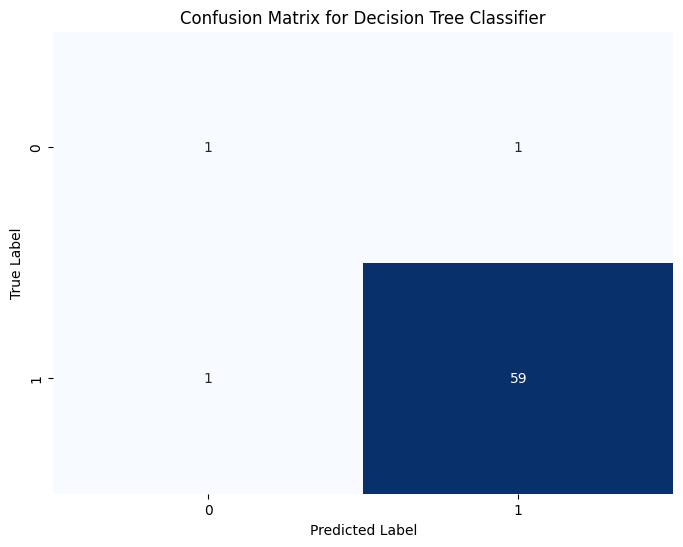

In [19]:
# Decision Tree Classifier
print("Decision Tree Classifier Results:")
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Performance metrics for Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

print(f"Accuracy: {accuracy_dt:.2f}")
print(f"Precision: {precision_dt:.2f}")
print(f"Recall: {recall_dt:.2f}")
print(f"F1-Score: {f1_dt:.2f}")

# Classification report for Decision Tree
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

# Confusion matrix for Decision Tree
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Support Vector Machine Classifier

Support Vector Machine Classifier Results:
Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1-Score: 0.97
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62



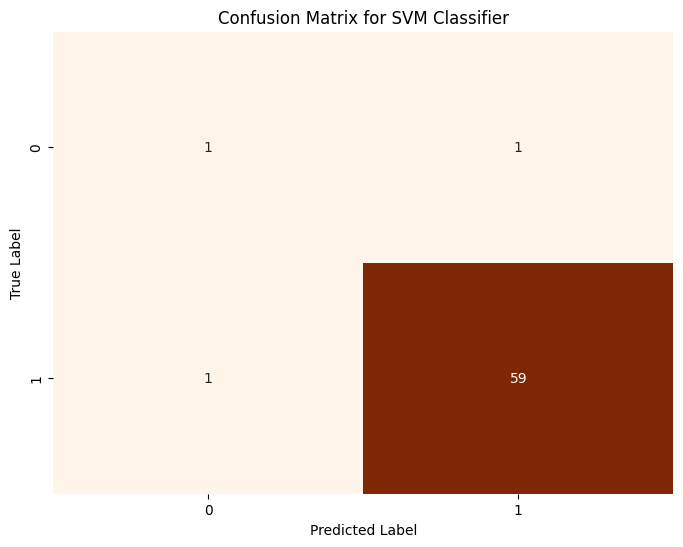

In [20]:
# Support Vector Machine (SVM) Classifier
print("Support Vector Machine Classifier Results:")
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Performance metrics for SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

print(f"Accuracy: {accuracy_svm:.2f}")
print(f"Precision: {precision_svm:.2f}")
print(f"Recall: {recall_svm:.2f}")
print(f"F1-Score: {f1_svm:.2f}")

# Classification report for SVM
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

# Confusion matrix for SVM
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title('Confusion Matrix for SVM Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### XGBoost Classifier Results

XGBoost Classifier Results:
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1-Score: 0.98
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.98      1.00      0.99        60

    accuracy                           0.98        62
   macro avg       0.99      0.75      0.83        62
weighted avg       0.98      0.98      0.98        62



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:46:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


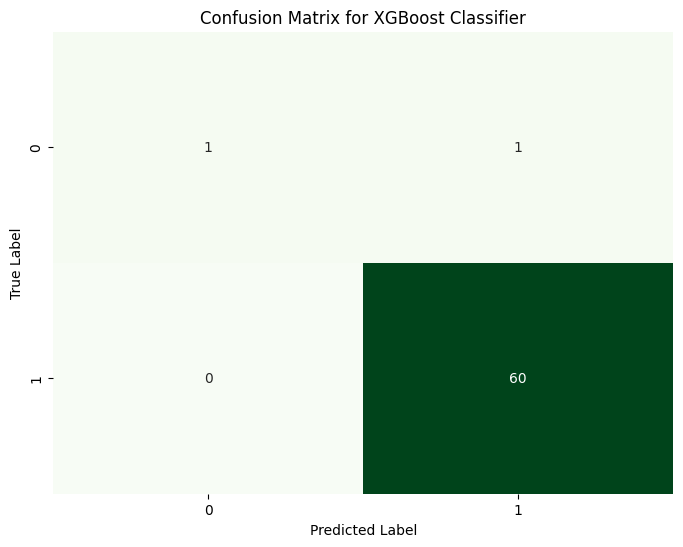

In [21]:
# XGBoost Classifier
print("XGBoost Classifier Results:")
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Performance metrics for XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')

print(f"Accuracy: {accuracy_xgb:.2f}")
print(f"Precision: {precision_xgb:.2f}")
print(f"Recall: {recall_xgb:.2f}")
print(f"F1-Score: {f1_xgb:.2f}")

# Classification report for XGBoost
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

# Confusion matrix for XGBoost
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix for XGBoost Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### AdaBoost Classifier

AdaBoost Classifier Results:
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1-Score: 0.98
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.98      1.00      0.99        60

    accuracy                           0.98        62
   macro avg       0.99      0.75      0.83        62
weighted avg       0.98      0.98      0.98        62



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


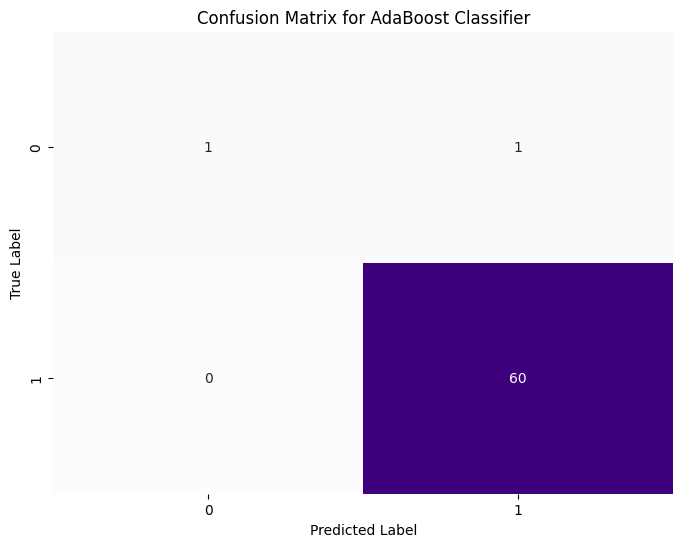

In [22]:
print("AdaBoost Classifier Results:")
ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)
y_pred_ada = ada_model.predict(X_test)

# Performance metrics for AdaBoost
accuracy_ada = accuracy_score(y_test, y_pred_ada)
precision_ada = precision_score(y_test, y_pred_ada, average='weighted')
recall_ada = recall_score(y_test, y_pred_ada, average='weighted')
f1_ada = f1_score(y_test, y_pred_ada, average='weighted')

print(f"Accuracy: {accuracy_ada:.2f}")
print(f"Precision: {precision_ada:.2f}")
print(f"Recall: {recall_ada:.2f}")
print(f"F1-Score: {f1_ada:.2f}")

# Classification report for AdaBoost
print("Classification Report:\n", classification_report(y_test, y_pred_ada))

# Confusion matrix for AdaBoost
conf_matrix_ada = confusion_matrix(y_test, y_pred_ada)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ada, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title('Confusion Matrix for AdaBoost Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### LightGBM Classifier

LightGBM Classifier Results:
[LightGBM] [Info] Number of positive: 210, number of negative: 37
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001171 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 73
[LightGBM] [Info] Number of data points in the train set: 247, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.850202 -> initscore=1.736190
[LightGBM] [Info] Start training from score 1.736190
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

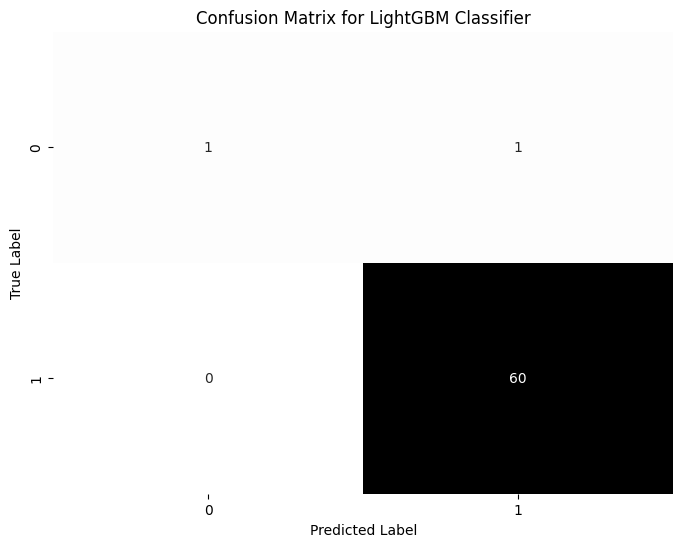

In [23]:
print("LightGBM Classifier Results:")
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)

# Performance metrics for LightGBM
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
precision_lgb = precision_score(y_test, y_pred_lgb, average='weighted')
recall_lgb = recall_score(y_test, y_pred_lgb, average='weighted')
f1_lgb = f1_score(y_test, y_pred_lgb, average='weighted')

print(f"Accuracy: {accuracy_lgb:.2f}")
print(f"Precision: {precision_lgb:.2f}")
print(f"Recall: {recall_lgb:.2f}")
print(f"F1-Score: {f1_lgb:.2f}")

# Classification report for LightGBM
print("Classification Report:\n", classification_report(y_test, y_pred_lgb))

# Confusion matrix for LightGBM
conf_matrix_lgb = confusion_matrix(y_test, y_pred_lgb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lgb, annot=True, fmt='d', cmap='Greys', cbar=False)
plt.title('Confusion Matrix for LightGBM Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()